# OpenCVの描画機能
## 目的
* OpenCVを使って色々な幾何学的形状を持つオブジェクトを描画する方法を学ぶ
* 次の関数の使い方を学ぶ:
<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html?highlight=cv2.line#cv2.line" target="_blank">cv2.line()</A>,
<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html?highlight=cv2.circle#cv2.circle" target="_blank">cv2.circle()</A> ,<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html?highlight=cv2.rect#cv2.rectangle" target="_blank">cv2.rectangle()</A>, <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html?highlight=cv2.elli#cv2.ellipse" target="_blank">cv2.ellipse()</A>, <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html?highlight=cv2.puttext#cv2.putText" target="_blank">cv2.putText()</A>

## コード
上記全ての関数に共通する引数を以下に示す(これらの関数は値としてNoneを返す):
* img : オブジェクトを描画する画像 (常に第1引数として指定する)
* color : オブジェクトの色．BGRで指定する場合はtupleとして指定する，例えば青であれば (255,0,0) ．グレースケールで指定する場合は単にスカラー値を指定する．
* thickness : 線や円などの太さ． 閉じている図形(例えば円)に対して -1 が指定された場合，そのオブジェクトは塗りつぶされる． デフォルト値は1
* lineType : 線のタイプ. 8連結，アンチーエイリアス等が取りうる値であり、デフォルトは8連結． cv2.LINE_AA を指定すると曲線の描画に適したアンチーエイリアスになる．

## 直線の描画
`cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])`

直線を描画するには直線の始点(pt1)と終点の座標(pt2)と色(color)を指定する必要がある．次のコードは黒い画像を背景に，画像の左上から右下に向かって青い線を描画する 

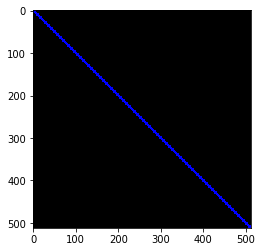

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
plt.show()

## 長方形の描画
`cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])`

長方形を描画するには長方形の左上(pt1)と右下(pt2)の角の座標、および色(color)を指定する必要がある．次のコードは画像の右上に緑色の長方形を描画する

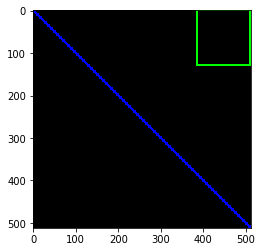

In [10]:
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
plt.show()

## 円の描画
`cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])`

円を描画するには中心の座標(center)と半径(radius)と色(color)を指定する．次のコードは，上述のコードにより描画した四角形の内側に円を描画する．

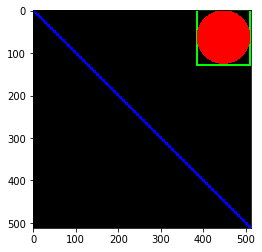

In [11]:
cv2.circle(img,(447,63), 63, (0,0,255), -1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

## 楕円の描画
楕円を描画するには、2通リの方法がある。ここでは、関数 `cv2.ellipse(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]])`によって楕円を描画する方法を紹介する。 第2引数(center)は楕円の中心座標(x,y)，第3引数(axes)は軸の長さ(長径, 短径)，第4引数(angle)は楕円の偏角を反時計回りで指定する．startAngle と endAngle は楕円を描画する始角と終角を長径から時計回りの方向で指定する(例えば0 と 360 を指定すると完璧な楕円が描ける)．詳細については cv2.ellipse() の説明を参照すること．

次のコードは楕円を描画する(コード)：

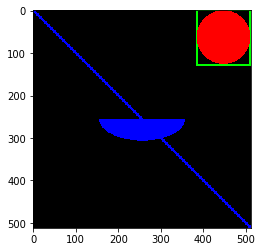

In [12]:
cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

多角形の描画
`cv2.polylines(img, pts, isClosed, color[, thickness[, lineType[, shift]]])`

多角形を描画するには多角形を形成する頂点の座標が必要で、引数 ptsとして、 ROWSx1x2 というサイズの配列にこれらの頂点情報を与える．ここで ROWS は頂点数で int32 型の変数でなければならない．

次のコードは4個の頂点を持つ多角形を黄色で描画する:

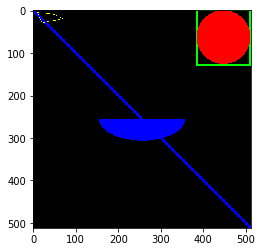

In [15]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

<font color="blue">Note</font>
第3引数isClosed が False の時は閉包図形ではなく、全ての点をつなぐ線を描画する（つまり、最後の点と最初の点は接続されない)．

<font color="blue">Note</font>
`cv2.polylines()` 関数は複数の線を描くために使われる．描画したい全ての線のリストを関数に渡せば，全ての線を独立して描画する．複数の線を描画する場合，線ごとに `cv2.line()` 関数を実行するよりも高速に描画できる．

## 画像にテキストを書き加える:
`cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])`

画像にテキストを描くために指定する引数：
* text: 書きたいテキストデータ(注意: 日本語は特別にフォントを用意しないと表示できない)
* org: 書く場所の座標(テキストを書き始める位置の左下)
* fontFace: フォント ( OpenCVが提供するフォントの情報については cv2.putText() 関数のドキュメンテーションを参照のこと)--- 以下のいずれも FONT_ITALIC と組み合わせ可能:
    * FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN, FONT_HERSHEY_DUPLEX, 
    * FONT_HERSHEY_COMPLEX, FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL, 
    * FONT_HERSHEY_SCRIPT_SIMPLEX, FONT_HERSHEY_SCRIPT_COMPLEX
* fontScale: フォントサイズ (文字のサイズ)
* color:色
* thickness: 線の太さ
* lineTyle: 線の種類, lineType = cv2.LINE_AA が推奨されている
* bottomLeftOrigin(第9引数): Trueなら左下隅を原点、そうでなければ左上隅

次のコードは OpenCV という文字を白色で書き込む: 

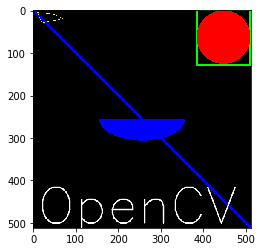

In [16]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

# 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: OpenCVのGUI機能<BR>
画像と動画の表示方法と保存方法，およびGUIの機能であるマウスとトラックバーの作り方を学ぶ
* 前の学習項目: [動画を扱う video.ipynb](  http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/video.html)<BR>
動画の再生方法，カメラを使った撮影方法と動画ファイルとしての保存方法を学ぶ．
* 次の学習項目: [ペイントツールとしてのマウス mouseHandling.ipynb ](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/mouseHandling.html)<BR>
マウスを使った描画機能を学ぶ．